In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import math


## Seccion 1: Super-Triangle


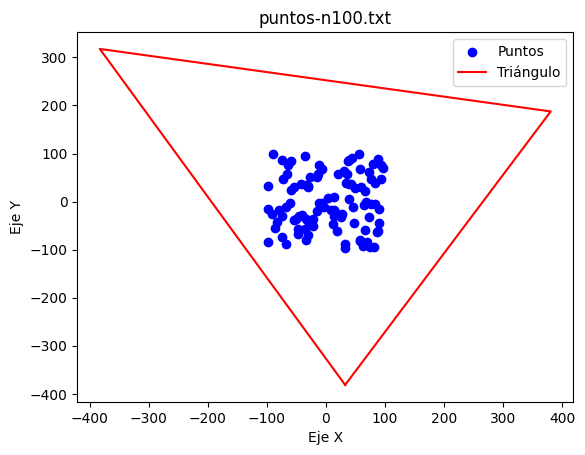

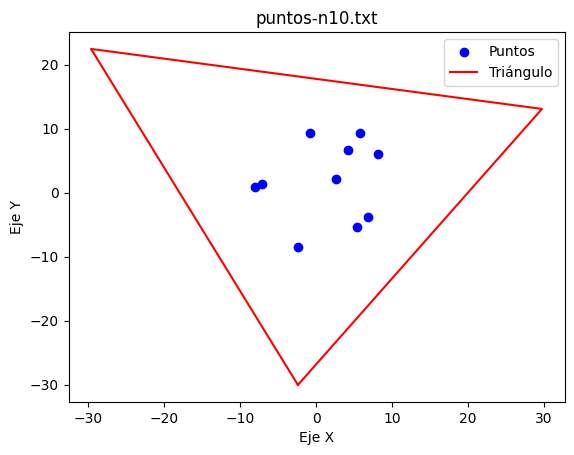

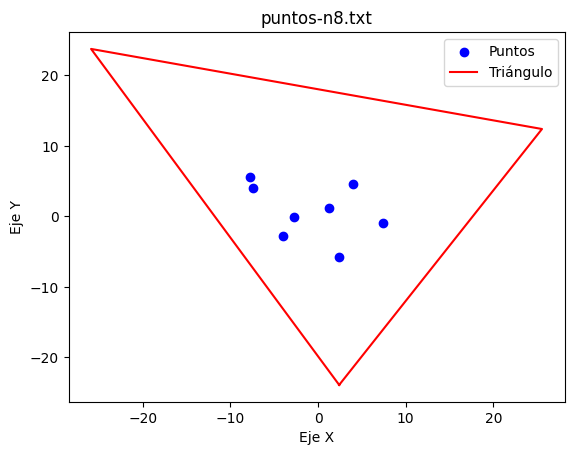

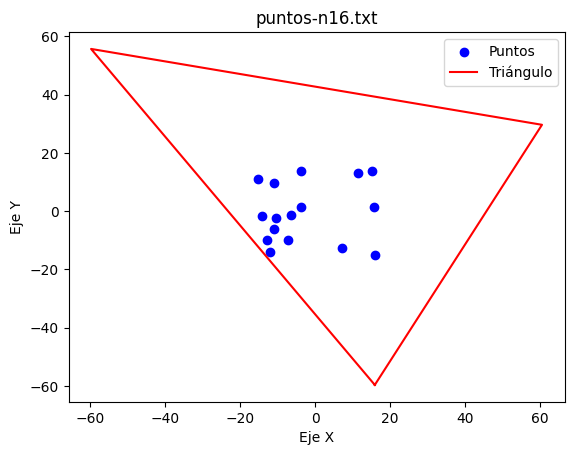

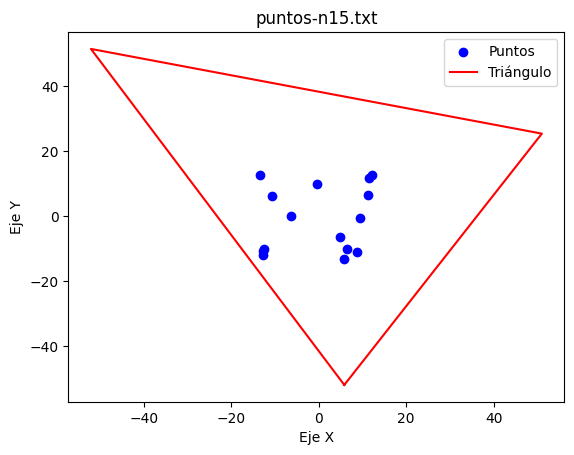

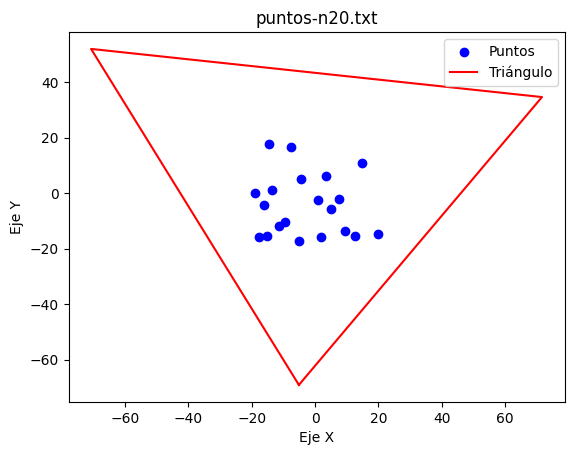

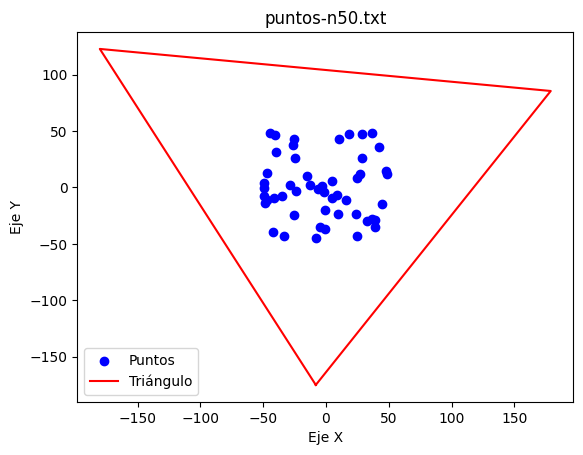

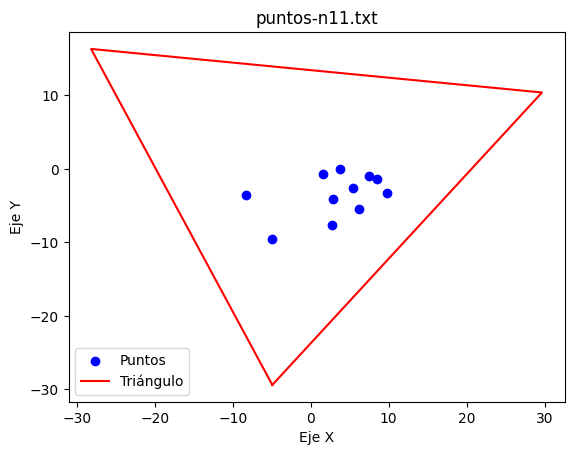

In [3]:


# Paso 1: Leer los puntos desde el archivo, ignorando la primera línea
def leer_puntos(archivo):
    with open(archivo, 'r') as f:
        f.readline()  # Ignorar la primera línea
        puntos = np.loadtxt(f, delimiter='\t')
    return puntos

# Paso 2: Calcular el par de puntos más alejados (farthest pair)
def calcular_farthest_pair(puntos,pathing):
    dist_max = 0
    for i in range(len(puntos)):
        for j in range(i + 1, len(puntos)):
            dist = distance.euclidean(puntos[i], puntos[j])
            if dist > dist_max:
                dist_max = dist
    return dist_max*(1+pathing)

# Paso 3: Calcular los vértices del triángulo que encierre los puntos
def calcular_vertices_triangulo(puntos, dist_max):
    punto_min_y = puntos[np.argmin(puntos[:, 1])]
    punto_min_x = puntos[np.argmin(puntos[:, 0])]
    punto_max_x = puntos[np.argmax(puntos[:, 0])]

    # Generar los tres vértices del triángulo
    vertice1 = (punto_min_y[0], punto_min_y[1] - dist_max)  # Base desde el punto con menor Y
    vertice2 = (punto_min_x[0] - dist_max, punto_min_x[1] + dist_max)  # Lado izquierdo
    vertice3 = (punto_max_x[0] + dist_max, punto_min_y[1] + dist_max)  # Lado derecho

    return np.array([vertice1, vertice2, vertice3])

# Paso 4: Dibujar los puntos y el triángulo
def graficar_puntos_y_triangulo(puntos, vertices,titulo):

    plt.scatter(puntos[:, 0], puntos[:, 1], color='blue', label='Puntos')

    plt.plot([vertices[0, 0], vertices[1, 0], vertices[2, 0], vertices[0, 0]],
             [vertices[0, 1], vertices[1, 1], vertices[2, 1], vertices[0, 1]],
             color='red', label='Triángulo')
    
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')

    plt.legend()

    plt.title(titulo)
    
    plt.show()

# Función principal
def main():
    prefix = "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/"
    archivos = ['puntos-n100.txt','puntos-n10.txt','puntos-n8.txt','puntos-n16.txt','puntos-n15.txt', 'puntos-n20.txt','puntos-n50.txt','puntos-n11.txt'  ]# Nombre del archivo con los puntos
    for archivo in archivos:
      puntos = leer_puntos(prefix+archivo)
      dist_max = calcular_farthest_pair(puntos,0.1)
      vertices = calcular_vertices_triangulo(puntos, dist_max)
      #print(f"{archivo}")
      graficar_puntos_y_triangulo(puntos, vertices,archivo)
      

# Ejecutar el código
main()


## Sección 2: Círculo que pasa por vértices de triángulo

In [30]:

def circuncentro(p1, p2, p3):
    # Extrae las coordenadas de los puntos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    # Calcula los determinantes intermedios
    D = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))

    if D == 0:
        print("Los puntos están alineados y no definen un círculo único.")
        return

    # Calcula las coordenadas del circuncentro
    Ux = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / D
    Uy = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / D

    # Calcula el radio del círculo
    radio = math.sqrt((Ux - x1)**2 + (Uy - y1)**2)

    return (Ux, Uy), radio

def graficar(p1, p2, p3):
    centro, radio = circuncentro(p1, p2, p3)
    print("Centro del círculo:", centro)
    print("Radio del círculo:", radio)

    # Graficar el círculo, el triángulo y los puntos
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')

    # Graficar el círculo circunscrito
    circle = plt.Circle(centro, radio, color='blue', fill=False, linestyle='--')
    ax.add_patch(circle)

    # Graficar los tres puntos
    plt.plot(*p1, 'ro', label="P1")
    plt.plot(*p2, 'go', label="P2")
    plt.plot(*p3, 'bo', label="P3")

    # Graficar el centro
    plt.plot(*centro, 'kx', label="Centro")

    # Dibujar el triángulo
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')

    # Ajustar los límites del gráfico
    plt.xlim(min(p1[0], p2[0], p3[0]) - radio, max(p1[0], p2[0], p3[0]) + radio)
    plt.ylim(min(p1[1], p2[1], p3[1]) - radio, max(p1[1], p2[1], p3[1]) + radio)

    # Etiquetas y leyenda
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("Círculo y triángulo que pasan por los tres puntos dados")

    plt.grid()
    plt.show()


## Sección 3 - Puntos dentro de círculos

In [4]:
def load_points_from_file(filename):
    points = []
    try:
        with open(filename, 'r') as file:
            num_points = int(file.readline().strip())

            # (x, y)
            for line in file:
                x, y = map(float, line.strip().split())
                points.append((x, y))

    except FileNotFoundError:
        print(f"File {filename} not found.")
    except ValueError:
        print("There was an error processing the file format.")

    return points

# test
# points = load_points_from_file('puntos-n11.txt')
# print("Loaded Points:", points)


def calculate_distance(point1, point2):
    """Calculate Euclidean distance between two points."""
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def calculate_area(A, B, C):
    """Calculate the area of a triangle given its vertices A, B, and C."""
    return abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1])) / 2.0

def circumcenter_and_radius(A, B, C):
    """Calculate the circumcenter and circumradius of a triangle given vertices A, B, and C."""
    # Calculate midpoints of AB and BC
    D = ((A[0] + B[0]) / 2, (A[1] + B[1]) / 2)
    E = ((B[0] + C[0]) / 2, (B[1] + C[1]) / 2)

    # slopes of AB and BC
    slope_AB = (B[1] - A[1]) / (B[0] - A[0]) if B[0] != A[0] else None
    slope_BC = (C[1] - B[1]) / (C[0] - B[0]) if C[0] != B[0] else None

    # perpendicular slopes
    perp_slope_AB = -1 / slope_AB if slope_AB is not None else None
    perp_slope_BC = -1 / slope_BC if slope_BC is not None else None

    # circumcenter
    if perp_slope_AB is not None and perp_slope_BC is not None:
        # y = mx + b form to solve
        x = (E[1] - D[1] - perp_slope_BC * E[0] + perp_slope_AB * D[0]) / (perp_slope_AB - perp_slope_BC)
        y = perp_slope_AB * (x - D[0]) + D[1]
    elif perp_slope_AB is None:
        # AB vertical
        x = D[0]
        y = perp_slope_BC * (x - E[0]) + E[1]
    elif perp_slope_BC is None:
        # BC vertical
        x = E[0]
        y = perp_slope_AB * (x - D[0]) + D[1]

    circumcenter = (x, y)

    # Calculate circumradius
    radius = calculate_distance(circumcenter, A)

    return circumcenter, radius

def is_point_within_circumcircle(point, circumcenter, radius):
    distance_to_center = calculate_distance(point, circumcenter)
    return distance_to_center <= radius

def check_points_against_triangle(filename, A, B, C):
    points = load_points_from_file(filename)

    circumcenter, radius = circumcenter_and_radius(A, B, C)

    for point in points:
        is_within = is_point_within_circumcircle(point, circumcenter, radius)

        print(f"El punto {point} {'esta' if is_within else 'NO esta'} dentro de la circunferencia del triangulo con los vertices {A}, {B}, y {C}")

# define the vertices of the triangle (right now its just a test case)
A = (5.365, -2.61)
B = (3.787, 0.038)
C = (2.691, -7.592)


filename = '/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n11.txt'  # replaceable with any file containing points

check_points_against_triangle(filename, A, B, C)

El punto (5.365, -2.61) esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (3.787, 0.038) esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (2.691, -7.592) NO esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (-4.939, -9.51) NO esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (-8.307, -3.583) NO esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (9.773, -3.284) NO esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (2.81, -4.122) esta dentro de la circunferencia del triangulo con los vertices (5.365, -2.61), (3.787, 0.038), y (2.691, -7.592)
El punto (6.216, 

## Sección 4 - Segmentos no repetidos

In [2]:
class Punto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def show(self):
        return [self.x, self.y]

class Segmento:
    def __init__(self, A, B):
        if A.x < B.x or (A.x == B.x and A.y < B.y):
            self.A = A
            self.B = B
        else:
            self.A = B
            self.B = A

    def show(self):
        return [self.A.x, self.A.y, self.B.x, self.B.y]

    def __eq__(self, other): #equivalencias
        return self.A == other.A and self.B == other.B

    def __hash__(self): #hasheado para el diccionario
        return hash((self.A.x, self.A.y, self.B.x, self.B.y))

class Triangulo:
    def __init__(self, puntos):
        self.puntos = puntos
        s1 = Segmento(puntos[0], puntos[1])
        s2 = Segmento(puntos[1], puntos[2])
        s3 = Segmento(puntos[2], puntos[0])
        self.lados = [s1, s2, s3]

        self.centro = None
        self.radio = None

        self.addDiccionario()

    def addDiccionario(self):
        for lado in self.lados:
            if lado in diccionario:
                diccionario[lado] += 1
            else:
                diccionario[lado] = 1

def lee_archivo(archivo):
    with open(archivo, "r") as f:
        lines = f.readlines()
    n = int(lines[0])
    aux = [list(map(float, line.split("\t"))) for line in lines[1:] if line.strip()]

    points = [Punto(a[0], a[1]) for a in aux]
    return n, points

diccionario = {}


puntos = [Punto(0,1),Punto(1,0),Punto(2,0),Punto(2,1),Punto(3,0)]
puntosT = [[puntos[0],puntos[1],puntos[2]],[puntos[1],puntos[2],puntos[3]],[puntos[2],puntos[3],puntos[4]]]

triangulos = [Triangulo(puntosT[0]),Triangulo(puntosT[1]),Triangulo(puntosT[2])]


for segmento, conteo in diccionario.items():
  if conteo<= 1:
    print(f"Segmento {segmento.show()} es único")


Segmento [0, 1, 1, 0] es único
Segmento [0, 1, 2, 0] es único
Segmento [1, 0, 2, 1] es único
Segmento [2, 1, 3, 0] es único
Segmento [2, 0, 3, 0] es único


# Sección 5 - Gráficos

In [3]:
# Función que lee el nombre de un archivo y regresa una lista
# de objetos tipo punto
def cargar_puntos(nombre_archivo):
    puntos = []
    with open(nombre_archivo, 'r') as file:
        num_points = int(file.readline().strip())

        for line in file:
            x, y = map(float, line.strip().split())
            puntos.append(Point(x, y))
    return puntos

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# función para crear y mostrar el gráfico
# figuras: [[Point]]
def crear_grafico(figuras):
    fig, ax = plt.subplots()

    ax.set_aspect('equal')
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)

    for i, puntos in enumerate(figuras):
        x_values = [punto.x for punto in puntos]
        y_values = [punto.y for punto in puntos]
        ax.plot(x_values, y_values, marker='o', label=f'Figura {i + 1}')

        if len(puntos) > 2:
            poligono = Polygon([(punto.x, punto.y) for punto in puntos], closed=True, fill=False, edgecolor='purple')
            ax.add_patch(poligono)

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.legend()
    plt.savefig("resultado.png", format='png', dpi=300)

    plt.show()
    plt.close()

# Triangulación de Delaunay